In [1]:
import pandas as pd
import numpy as np

dataframe1 = pd.read_csv('kmeandata.csv', header=None)
dataframe1.head()

,0,1
0,1.842080,4.607572
1,5.658583,4.799964
2,6.352579,3.290854
3,2.904017,4.612204
4,3.231979,4.939894


In [2]:
X = np.array(dataframe1)

In [3]:
import random
initialize_centroids = random.sample(range(0, len(dataframe1)), 3)
initialize_centroids

[0, 204, 263]

In [4]:
centroids = []
for i in initialize_centroids:
    centroids.append(dataframe1.loc[i])
print(centroids)

[0    1.842080
1    4.607572
Name: 0, dtype: float64, 0    5.633254
1    2.990023
Name: 204, dtype: float64, 0    5.502958
1    2.629246
Name: 263, dtype: float64]


In [5]:
centroids = np.array(centroids)
print(centroids)

[[1.84208  4.607572]
 [5.633254 2.990023]
 [5.502958 2.629246]]


In [6]:
#calculate the distance between column 1 and 2; exponent(**)
def calculate_distance(X1, X2):
    return(sum((X1 - X2)**2))**0.5

In [7]:
#find the closest centroid and assin to its list
def findClosestCentroids(ic, X):
    assigned_centroid = []
    for i in X:
        distance=[]
        for j in ic:
            distance.append(calculate_distance(i, j))
        assigned_centroid.append(np.argmin(distance))
    return assigned_centroid

In [8]:
get_centroids = findClosestCentroids(centroids, X)
get_centroids

[0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 0,
 0,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 0,
 0,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,


In [9]:
#Based on mean of data points, move the centroids
def calculate_centroids(clusters, X):
    new_centroids = []
    new_dataframe = pd.concat([pd.DataFrame(X), pd.DataFrame(clusters, columns=['cluster'])],
                      axis=1)
    for c in set(new_dataframe['cluster']):
        current_cluster = new_dataframe[new_dataframe['cluster'] == c][new_dataframe.columns[:-1]]
        cluster_mean = current_cluster.mean(axis=0)
        new_centroids.append(cluster_mean)
    return new_centroids

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

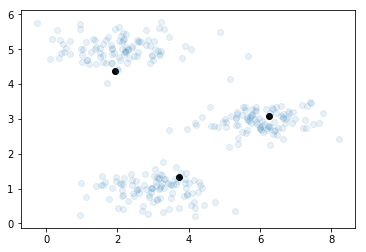

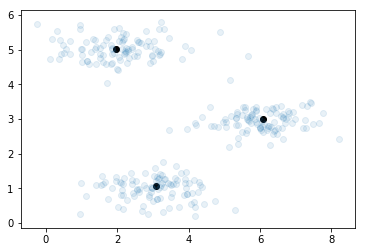

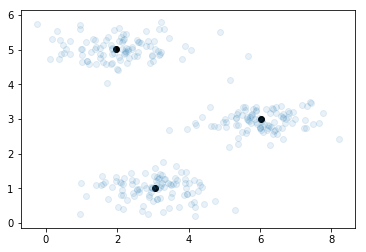

In [11]:
for i in range(3):
    get_centroids = findClosestCentroids(centroids, X)
    centroids = calculate_centroids(get_centroids, X)
    #print(centroids)
    plt.figure()
    plt.scatter(np.array(centroids)[:, 0], np.array(centroids)[:, 1], color='black')
    plt.scatter(X[:, 0], X[:, 1], alpha=0.1)
    plt.show()

# Practical Usage of K Means Clustering

1. Market Segmentations
    purchase history
    interests 
    activity monitoring
    find target customers for different campaigns
2. Computer Vision

Also used as a for preprocessing step for some alogorithms.